In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

## Additivity ##

Calculating expectation by plugging into the definition works in simple cases, but often it can be cumbersome or lack insight. The most powerful result for calculating expectation turns out not to be the definition. It looks rather innocuous:

### Additivity of Expectation ###
Let $X$ and $Y$ be two random variables defined on the same probability space. Then

$$
E(X+Y) = E(X) + E(Y)
$$

Before we look more closely at this result, note that we are assuming that all the expectations exist; we will do this throughout in this course. 

And now note that **there are no assumptions about the relation between $X$ and $Y$**. They could be dependent or independent. Regardless, the expectation of the sum is the sum of the expectations. This makes the result powerful.

Additivity follows easily from the definition of $X+Y$ and the definition of expectation on the domain space. First note that the random variable $X+Y$ is the function defined by

$$
(X+Y)(\omega) = X(\omega) + Y(\omega) ~~~~ \text{for all }
\omega \in \Omega
$$

Thus a "value of $X+Y$ weighted by the probability" can be written as

$$
(X+Y)(\omega) \cdot P(\omega) = X(\omega)P(\omega) + 
Y(\omega)P(\omega )
$$

Sum the two sides over all $\omega \in \Omega$ to prove additivty of expecation.

By induction, additivity extends to any finite number of random variables. If $X_1, X_2, \ldots , X_n$ are random variables defined on the same probability space, then

$$
E(X_1 + X_2 + \cdots + X_n) = E(X_1) + E(X_2) + \cdots + E(X_n)
$$

If you are trying to find an expectation, then the way to use additivity is to write your random variable as a sum of simpler variables whose expectations you know or can calculate easily. The rest of this section consists of examples of this technique.

### Sample Sum ###
Let $X_1, X_2, \ldots , X_n$ be a sample drawn at random from a numerical population that has mean $\mu$, and let the sample sum be 
$$
S_n = X_1 + X_2 + \cdots + X_n
$$
Then, regardless of whether the sample was drawn with or without replacement, each $X_i$ has the same distribution as the population. This is clearly true if the sampling is with replacement, and it is true by symmetry if the sampling is without replacement as we saw in an earlier chapter.

So, regardless of whether the sample is drawn with or without replacement, $E(X_i) = \mu$ for each $i$, and hence

$$
E(S_n) = E(X_1) + E(X_2) + \cdots + E(X_n) = n\mu
$$

### Linear Function Rule ###
Let $X$ be a random variable with expectation $E(X)$ and let $Y = aX$ for some constant $a$. For example, when you change units of a random length from inches to centimeters, then $a = 2.54$. 

For every $\omega \in \Omega$, we have $Y(\omega) = aX(\omega)$. So

$$
E(Y) ~ = ~ \sum_{\text{all }\omega} aX(\omega)P(\omega)
~ = ~a \sum_{\text{all }\omega} X(\omega)P(\omega )  ~ = ~ aE(X)
$$

Now consider the *linear tranformation* $W = aX + b$. This kind of transformation happens for example when you change units from Celsius to Fahreneheit. In that case $a = 9/5$ and $b = 32$.

Then $W = Y + b$, so by additivity of expectation,

$$
E(W) = E(aX + b) = E(aX) + E(b) = aE(X) + b
$$

So for example, $E(2X - 3) = 2E(X) - 3$. Also $E(X/2) = E(X)/2$, and $E(1 - X) = 1 - E(X)$.

The expectation of a linear transformation of $X$ is the linear transformation of the expectation of $X$. This is a handy result as we will often be transforming variables linearly. But expectation behaves differently under non-linear transformations, as we will see in the next section.

### Example: An Unbiased Estimator ###
Suppose $\theta$ is a parameter of the distribution of $X$, and suppose $E(X) = \theta$. Then we say that * $X$ is an unbiased estimator of $\theta$*. 

If an estimator is unbiased, and you use it to generate estimates repeatedly and independently, then in the long run the average of all the estimates is equal to the parameter being estimated. On average, the unbiased estimator is neither higher nor lower than the parameter. That's usually considered a good quality in an estimator.

As in the sample sum example above, let $S_n$ be the sum of a sample of size $n$ drawn from a population that has mean $\mu$. Let $A_n$ be the sample average, that is,

$$
A_n = \frac{S_n}{n}
$$

Then, regardless of whether the draws were made with replacement or without,

$$
\begin{align*}
E(A_n) &= \frac{E(S_n)}{n} ~~~~ \text{(linear function rule)} \\
&= \frac{n \mu}{n} ~~~~~~~~~ \text{(} E(S_n) = n\mu \text{)} \\
&= \mu
\end{align*}
$$

Thus the sample mean is an unbiased estimator of the population mean.

Suppose we have a sample $X_1, X_2, \ldots , X_n$ where each variable is uniform on $1, 2, \ldots , N$ for some fixed $N$, and we are trying to estimate $N$. This was the setting in the German warplanes example in Data 8. The expectation of each of the uniform variables is $(N+1)/2$, as we have seen earlier. So if $A_n$ is the sample mean, then

$$
E(A_n) = \frac{N+1}{2}
$$

and so $A_n$ is *not* an unbiased estimator of $N$. That's not surprising because $N$ is the maximum possible value of each observation and $A_n$ should be somewhere in the middle of all the possible values.

But because $E(A_n)$ is a linear function of $N$, we can tweak $A_n$ to create an unbiased estimator of $N$. We just have to invert the linear function. Let $A_n^* = 2A_n - 1$. Then

$$
E(A_n^*) = 2E(A_n) - 1 = 2 \cdot \frac{N+1}{2} - 1 = N
$$

so $A_n^*$ is an unbiased estimator of $N$.

### The Method of Indicators ###
This is a powerful method for finding expected counts. It is based on the observation that among $n$ trials, the number of "good" results can be counted by first coding each "good" result as 1 and each of the other results as 0, and then adding the 1's and 0's.

If $N$ is the total number of good results among $n$, then

$$
N = I_1 + I_2 + \cdots + I_n
$$

where for each $j$ in the range 1 through $n$, $I_j$ is the indicator of "the result of the $j$th trial is good". So

$$
\begin{align*}
E(N) &= E(I_1) + E(I_2) + \cdots + E(I_n) \\ 
&= P(\text{result of Trial } 1 \text{ is good}) +
P(\text{result of Trial } 2 \text{ is good}) + \cdots +
P(\text{result of Trial } n \text{ is good}) \\
\end{align*}
$$

The additivity works regardless of whether the trials are dependent or independent. 

We conclude this section with three applications of the method of indicators.

### Example: Binomial ###
Let $X$ have the binomial $(n, p)$ distribution. Then $X$ can be thought of as the number of successes in $n$ i.i.d. Bernoulli $(p)$ trials, and we can write

$$
X = I_1 + I_2 + \cdots + I_n
$$

where for each $j$ in the range 1 through $n$, $I_j$ is the indicator of "Trial $j$ is a success". Thus

$$
\begin{align*}
E(X) &= E(I_1) + E(I_2) + \cdots + E(I_n) ~~~~ \text{(additivity)} \\
&= np ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \text{(}E(I_j) = p \text{ for all } j \text{)}
\end{align*}
$$

Examples of use:
- The expected number of heads in 100 tosses of a coin is $100 \times 0.5 = 50$. 
- The expected number of heads in 25 tosses is 12.5. Remember that the expectation of an integer-valued random variable need not be an integer. 
- The expected number of times green pockets win in 20 independent spins of a roulette wheel is $20 \times \frac{2}{38} = 1.053$, roughly.

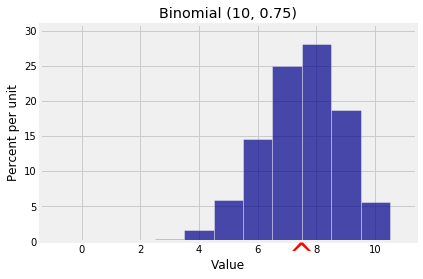

In [2]:
k = np.arange(11)
probs = stats.binom.pmf(k, 10, 0.75)
bin_10_75 = Table().values(k).probability(probs)
Plot(bin_10_75, show_ev=True)
plt.title('Binomial (10, 0.75)');

Notice that we didn't use independence. Additivity of expectation works whether or not the random variables being added are independent. This will be very helpful in the next example.

### Example: Hypergeometric ###
Let $X$ have the hypergeometric $(N, G, n)$ distribution. Then $X$ can be thought of as the number of good elements in $n$ draws made at random without replacement from a population of $N = G+B$ elements of which $G$ are good and $B$ bad. Then

$$
X = I_1 + I_2 + \cdots + I_n
$$

where for each $j$ in the range 1 through $n$, $I_j$ is the indicator of "Draw $j$ results in a good element". Thus

$$
\begin{align*}
E(X) &= E(I_1) + E(I_2) + \cdots + E(I_n) ~~~~ \text{(additivity)} \\ \\
&= n\frac{G}{N} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
\text{(}E(I_j) = \frac{G}{N} \text{ for all } j \text{ by symmetry)}
\end{align*}
$$

This is the same answer as for the binomial, with the population proportion of good elements $G/N$ replacing $p$.

Examples of use:
- The expected number of red cards in a bridge hand of 13 cards is $13 \times \frac{26}{52} = 6.5$. 
- The expected number of Independent voters in a simple random sample of 200 people drawn from a population in which 10% of the voters are Independent is $200 \times 0.1 = 20$. 

These answers are intuitively clear, and we now have a theoretical justification for them.

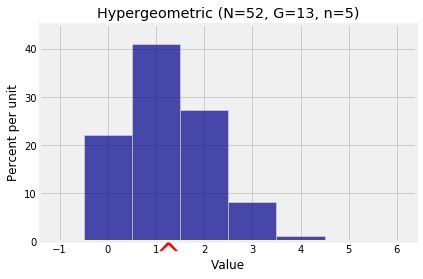

In [3]:
# Number of hearts in a poker hand 
N = 52
G = 13
n = 5
k = np.arange(6)
probs = stats.hypergeom.pmf(k, N, G, n)
hyp_dist = Table().values(k).probability(probs)
Plot(hyp_dist, show_ev=True)
plt.title('Hypergeometric (N=52, G=13, n=5)');

### Example: Number of Missing Classes ###
A population consists of four classes of individuals, in the proportions 0.4, 0.3, 0.2, and 0.1. A random sample of $n$ individuals is chosen so that the choices are mutually independent. What is the expected number of classes that are missing in the sample?

If $M$ is the number of missing classes, then

$$
M = I_1 + I_2 + I_3 + I_4
$$

where for each $j$, $I_j$ is the indicator of "Class $j$ is missing in the sample". 

For Class $j$ to be missing in the sample, all $n$ selected individuals have to be from the other classes. Thus

$$
E(M) = E(I_1) + E(I_2) + E(I_3) + E(I_4)
= 0.6^n + 0.7^n + 0.8^n + 0.9^n
$$

The four indicators aren't independent but that doesn't affect the additivity of expectation.